<a href="https://colab.research.google.com/github/karim-mammadov/My_Elevvo_Pathways_Tasks/blob/main/Student_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Score Prediction  

## Description  
The purpose of this project is to build a model that predicts students’ exam scores based on their study hours and other factors.  

### Steps:  
- **Dataset**: Student Performance Factors (Kaggle)  
- Perform data cleaning and exploratory visualization to understand the dataset  
- Split the dataset into training and testing sets  
- Train a **Linear Regression model** to estimate the final score  
- Visualize predictions and evaluate model performance  

---

## Tools & Libraries  
- Python  
- Pandas  
- Matplotlib  
- Scikit-learn  

---

## Covered Topics  
- Regression  
- Evaluation Metrics (MSE, R², etc.)  
- Data Cleaning & Visualization  

---

## Bonus  
- Try **Polynomial Regression** and compare performance with Linear Regression  
- Experiment with different feature combinations (e.g., adding or removing features like sleep, participation, attendance, etc.)  


## Data Loading


In [ ]:
import pandas as pd

try:
    df = pd.read_csv('/content/StudentPerformanceFactors.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'student_performance.csv' not found. Please upload the file or provide the correct path.")
    df = None

Dataset loaded successfully.


In [ ]:
print(df.head())


   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

## Data Cleaning and Exploration


In [ ]:
if df is not None:
    print("\nDataset Info:")
    df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 

In [ ]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [ ]:
if df is not None:

    for col in ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']:
        if df[col].isnull().any():
            mode_value = df[col].mode()[0]
            df[col].fillna(mode_value, inplace=True)
            print(f"Filled missing values in '{col}' with mode: {mode_value}")

    print("\nMissing values after filling:")
    print(df.isnull().sum())
else:
    print("DataFrame not loaded. Cannot fill missing values.")


Missing values after filling:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


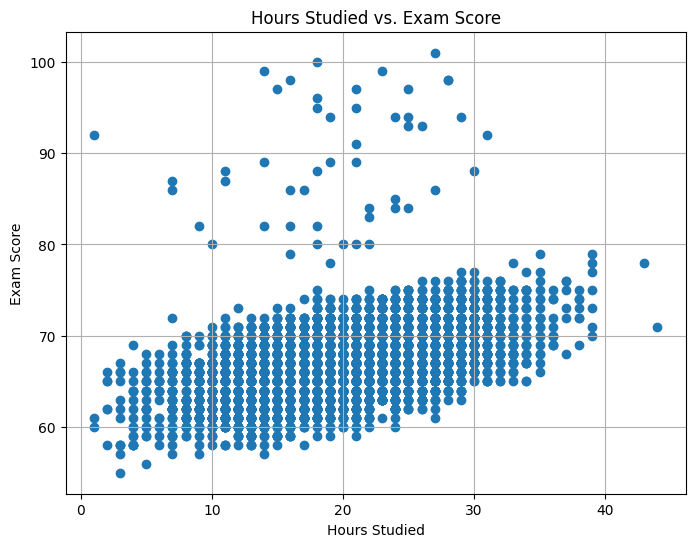

In [ ]:
# Visualization
import matplotlib.pyplot as plt
if df is not None:
    if 'Hours_Studied' in df.columns and 'Exam_Score' in df.columns:
        plt.figure(figsize=(8, 6))
        plt.scatter(df['Hours_Studied'], df['Exam_Score'])
        plt.xlabel('Hours Studied')
        plt.ylabel('Exam Score')
        plt.title('Hours Studied vs. Exam Score')
        plt.grid(True)
        plt.show()
    else:
        print("\n'Hours_Studied' or 'Exam_Score' column not found in the dataset. Cannot perform visualization.")
else:
    print("DataFrame not loaded. Cannot perform visualization.")

## Data Splitting


In [ ]:
if df is not None and 'Hours_Studied' in df.columns and 'Exam_Score' in df.columns:
    from sklearn.model_selection import train_test_split

    X = df[['Hours_Studied']]
    y = df['Exam_Score']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"\nTraining set shape: {X_train.shape}, {y_train.shape}")
    print(f"Testing set shape: {X_test.shape}, {y_test.shape}")
else:
    print("\nCannot split data. Ensure dataset is loaded and contains 'Study Hours' and 'Scores' columns.")


Training set shape: (5285, 1), (5285,)
Testing set shape: (1322, 1), (1322,)


## Train Linear Regression Model
Train a linear regression model using the training data.

In [ ]:
if 'X_train' in locals() and 'y_train' in locals():
    from sklearn.linear_model import LinearRegression

    model = LinearRegression()
    model.fit(X_train, y_train)

    print("\nLinear Regression model trained successfully.")
    print(f"Coefficient (slope): {model.coef_[0]:.2f}")
    print(f"Intercept: {model.intercept_:.2f}")
else:
    print("\nCannot train model. Data splitting was not successful.")


Linear Regression model trained successfully.
Coefficient (slope): 0.29
Intercept: 61.51


## Visualize Predictions and Evaluate Model Performance


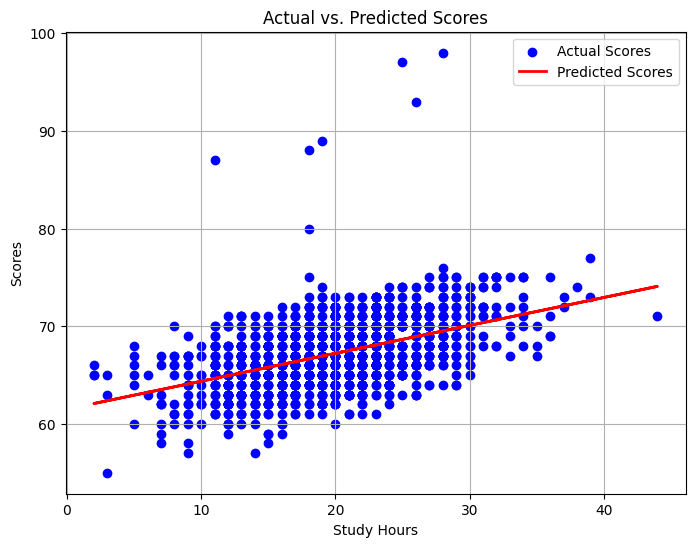


Model Evaluation:
Mean Absolute Error (MAE): 2.45
Mean Squared Error (MSE): 10.86
Root Mean Squared Error (RMSE): 3.29


In [ ]:
if 'model' in locals() and 'X_test' in locals() and 'y_test' in locals():
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    import numpy as np

    y_pred = model.predict(X_test)

    # Visualize predictions
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual Scores')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Scores')
    plt.xlabel('Study Hours')
    plt.ylabel('Scores')
    plt.title('Actual vs. Predicted Scores')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"\nModel Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

else:
    print("\nCannot visualize predictions or evaluate model. Ensure the model is trained and test data is available.")

## Bonus: Polynomial Regression



Polynomial Regression (Degree 2) Model Evaluation:
Mean Absolute Error (MAE): 2.44
Mean Squared Error (MSE): 10.84
Root Mean Squared Error (RMSE): 3.29


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


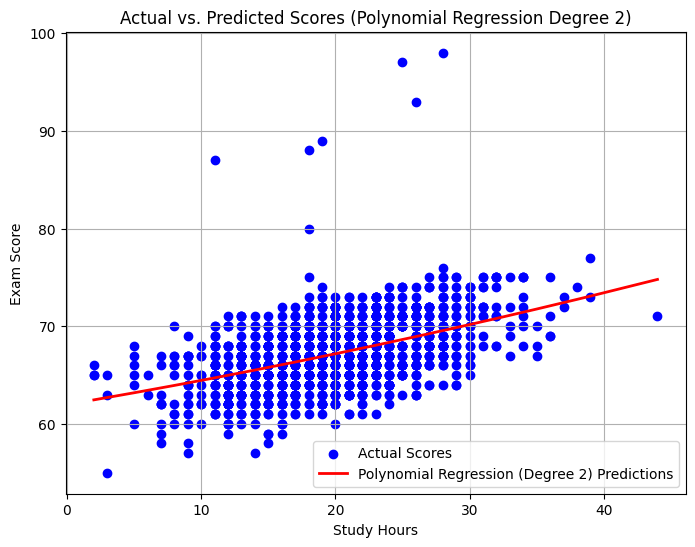

In [ ]:
if df is not None and 'Hours_Studied' in df.columns and 'Exam_Score' in df.columns:
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import LinearRegression
    from sklearn.pipeline import make_pipeline
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    import numpy as np

    # Create polynomial features
    degree = 2
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    # Split the polynomial features data
    X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    # Create a pipeline with polynomial features and linear regression
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    # Train the polynomial regression model
    poly_model.fit(X_train, y_train) # Fit with original X_train

    # Make predictions
    y_pred_poly = poly_model.predict(X_test)

    # Evaluate performance
    mae_poly = mean_absolute_error(y_test, y_pred_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    rmse_poly = np.sqrt(mse_poly)

    print(f"\nPolynomial Regression (Degree {degree}) Model Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae_poly:.2f}")
    print(f"Mean Squared Error (MSE): {mse_poly:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse_poly:.2f}")

    X_test_sorted = np.sort(X_test, axis=0)
    y_pred_poly_sorted = poly_model.predict(X_test_sorted)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual Scores')
    plt.plot(X_test_sorted, y_pred_poly_sorted, color='red', linewidth=2, label=f'Polynomial Regression (Degree {degree}) Predictions')
    plt.xlabel('Study Hours')
    plt.ylabel('Exam Score')
    plt.title(f'Actual vs. Predicted Scores (Polynomial Regression Degree {degree})')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("\nCannot perform Polynomial Regression. Ensure dataset is loaded and contains 'Hours_Studied' and 'Exam_Score' columns.")